[YB 미니 프로젝트(2) 공지]


- 관련 사이트 : https://dacon.io/competitions/open/235610/overview/description

- 과제 : 데이콘의 '와인 품질 분류 예측 경진대회' 데이터셋을 전처리 및 시각화하고, 분류 알고리즘 적용하기

- 조건 : 분류 모델 3가지 이상 적용

- 분석 파일을 1) 제출 후 리더보드에서 점수 확인 2) github에 업로드하여 점수와 깃허브 링크를 과제함에 댓글로 달아주시면 됩니다. 

- 점수 고득점팀 1위 조원분들께는 우수학회원 점수 가산이 있을 예정입니다.

​
📍10/30, 11/6 월요일 발표 이후 조별로 모여 프로젝트를 진행합니다.

📍중간 보고: 11/6 (월)

- 프로젝트 회의 후 당일 자정까지 프로젝트 회의 보고서 제출

📍11/10 (금)까지 최종 결과물(조당 하나의 깃허브 링크)을 아래의 댓글로 제출

📍11/13(월): 프로젝트 최종 발표

## 전처리

In [2]:
import pandas as pd

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
enc.fit(train['type'])
train['type']=enc.transform(train['type'])
test['type']=enc.transform(test['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [4]:
X_train = train.drop(['index','quality'],axis=1)
y_train = train['quality']

X_test = test.drop('index',axis=1)

X_train.shape, y_train.shape, X_test.shape

((5497, 12), (5497,), (1000, 12))

In [10]:
# train data를 train_test_split()으로 분할하여 학습하기
from sklearn.model_selection import train_test_split

split_X_train, split_X_test, split_y_train, split_y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=156)

## 04. 랜덤 포레스트

### 랜덤 포레스트의 개요 및 실습

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(split_X_train, split_y_train)
pred_test = rf_clf.predict(split_X_test)
accuracy_test = accuracy_score(split_y_test, pred_test)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy_test))

결정 트리 예측 정확도 : 0.6745


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

In [9]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 400],
    'max_depth':[None, 5],
    'min_samples_leaf':[1, 2, 3],
    'min_samples_split':[2, 4]
    }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)
print('최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 :
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
최고 평균 정확도 수치 : 0.6293


#### rf_clf1 : 최적의 하이퍼 파라미터를 넣은 모델

In [47]:
params = {
    'n_estimators':[400],
    'max_depth':[None],
    'min_samples_leaf':[1],
    'min_samples_split':[2]
    }

In [15]:
rf_clf1 = RandomForestClassifier(n_estimators=400, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)

In [16]:
submission = pd.read_csv('./data/sample_submission.csv')
submission['quality'] = pred
submission.to_csv('randomforest_split_test.csv', index=False)

#### feature_importance_ 속성으로 피처 중요도 시각화

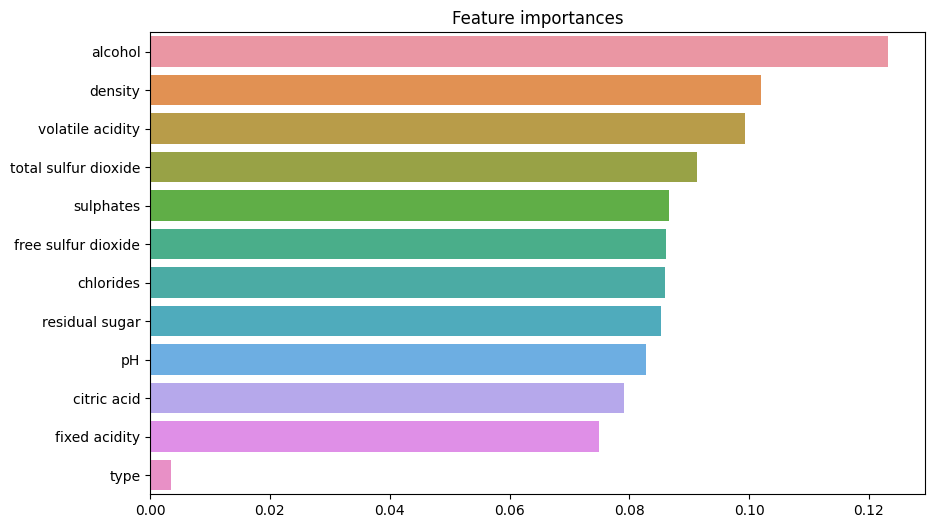

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# feature importance 추출 및 정렬
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_sorted = ftr_importances.sort_values(ascending=False)

# feature importance를 column별로 시각화하기
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x = ftr_sorted, y = ftr_sorted.index)
plt.show()

## 05. GBM (Gradient Boosting Machine)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(split_X_train, split_y_train)
gb_pred = gb_clf.predict(split_X_test)
gb_accuracy = accuracy_score(split_y_test, gb_pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(gb_accuracy))

print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', gb_clf.get_params())

결정 트리 예측 정확도 : 0.6091
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


### GBM 하이퍼 파라미터 및 튜닝 : 매우 오래 걸림

In [20]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 400],
    'learning_rate': [0.05, 0.1],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 4]
    }

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=3, verbose=1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)
print('최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


최적 하이퍼 파라미터 :
 {'learning_rate': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
최고 평균 정확도 수치 : 0.6082


In [21]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)

#### feature_importance_ 속성으로 피처 중요도 시각화

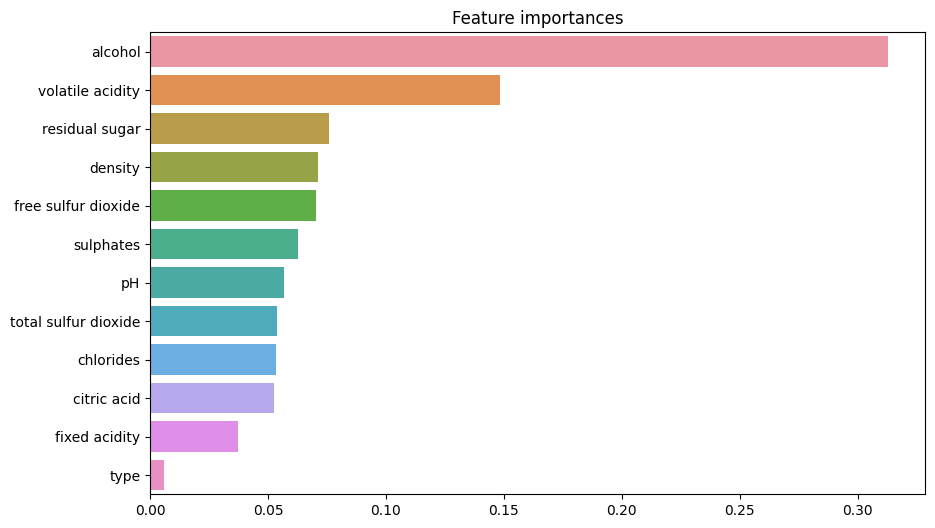

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# feature importance 추출 및 정렬
ftr_importances_values_gb = gb_clf.feature_importances_
ftr_importances_gb = pd.Series(ftr_importances_values_gb, index=X_train.columns)
ftr_sorted_gb = ftr_importances_gb.sort_values(ascending=False)

# feature importance를 column별로 시각화하기
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x = ftr_sorted_gb, y = ftr_sorted_gb.index)
plt.show()

In [22]:
submission = pd.read_csv('./data/sample_submission.csv')
submission['quality'] = gb_pred
submission.to_csv('gradient_boosting_split_test_2.csv', index=False)

#### 그래디언트 부스팅 1차 결과 : 0.632

cv = 2

split 안 함

최적 하이퍼 파라미터 : {'learning_rate': 0.05, 'n_estimators': 500}

최고 평균 정확도 수치 : 0.5854

#### 그래디언트 부스팅 2차 결과 : 0.655

cv = 5

split 안 함

최적 하이퍼 파라미터 : {'learning_rate': 0.05, 'n_estimators': 1000}

최고 평균 정확도 수치 : 0.6278

#### 그래디언트 부스팅 split 이후 1차 결과 : 0.65

cv = 2

split 함

최적 하이퍼 파라미터 : {'learning_rate': 0.05, 'n_estimators': 800}

최고 평균 정확도 수치 : 0.5889